[문제]  

SMOTE와 ADASYN에서 k-neighbors를 조절하여 변화에 대해 설명하고, Random Undersampling, Random Oversampling 기법을 사용하였을 때와 비교하세요. 
단, 조별로 지난 시간에 사용하였던 분류 모델을 사용하고, 데이터가 어떻게 구분되었는지 시각적으로 보여주세요. (영역 구분 또는 점 모양, 색깔 구분 등의 방법 사용)


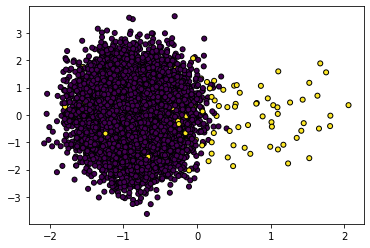

In [ ]:
#make_classification 함수로 분류를 위한 가상 데이터 생성

import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X1, Y1 = make_classification(n_samples=10000, weights=[0.99],  n_clusters_per_class = 1, random_state = 2021 )
plt.scatter(X1[:, 0]  , X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

In [ ]:
#생성된 데이터 구조 확인

print(Y1.shape)
print(X1.shape)
np.bincount(Y1)

(10000,)
(10000, 20)


array([9858,  142])

In [ ]:
#train_test_split 

from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.33, random_state = 2021)

In [ ]:
#Undersampling; 불균형 데이터, 다수 범주의 값들을 감소시키고 데이터 비율에 맞춰서 샘플링

from collections import Counter
print('Original dataset shape %s' % Counter(Y1_train))

from imblearn.under_sampling import RandomUnderSampler
X1_resampled, Y1_resampled = RandomUnderSampler(random_state=2021).fit_resample(X1_train, Y1_train)
print('Resampled dataset shape %s' % Counter(Y1_resampled))

Original dataset shape Counter({0: 6604, 1: 96})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Resampled dataset shape Counter({0: 96, 1: 96})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


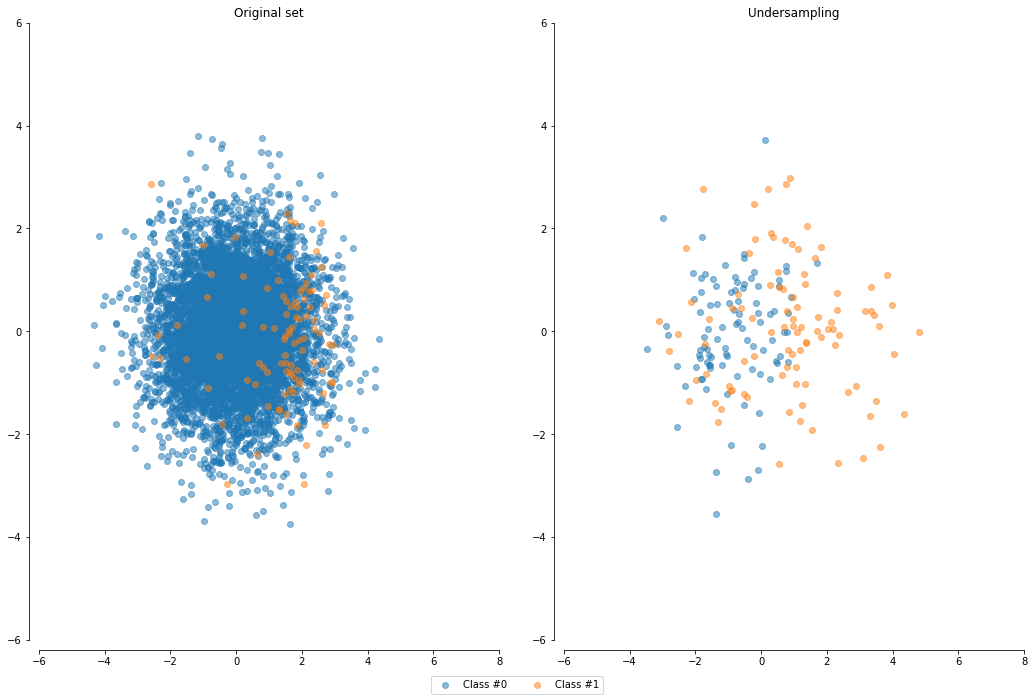

In [ ]:
# visualization undersampling
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X1_train)
X111_res_vis = pca.fit_transform(X1_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[Y1_train == 0, 0], X_vis[Y1_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[Y1_train == 1, 0], X_vis[Y1_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X111_res_vis[ Y1_resampled== 0, 0], X111_res_vis[Y1_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X111_res_vis[Y1_resampled == 1, 0], X111_res_vis[Y1_resampled== 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('Undersampling')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.rcParams['figure.figsize'] = (15, 10)
plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

In [ ]:
# Oversampling; 상대적으로 적은 클래스의 데이터를 over해서 늘린다.  

#SMOTE 사용
#가장 가까운 k개의 샘플을 찾고 그 이웃들간에 선을 그어 무작위 점을 생성
#k_neighbors = 1

from imblearn.over_sampling import SMOTE
SEED = 2021
print('Original dataset shape %s' % Counter(Y1_train))

smo1 = SMOTE(k_neighbors = 1, random_state=SEED)
X11_res, Y11_res = smo1.fit_resample(X1_train, Y1_train)
print('Resampled dataset shape %s' % Counter(Y11_res))

Original dataset shape Counter({0: 6604, 1: 96})
Resampled dataset shape Counter({0: 6604, 1: 6604})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#SMOTE 사용, k_neighbors = 5
from imblearn.over_sampling import SMOTE
SEED = 2021
print('Original dataset shape %s' % Counter(Y1_train))

smo2 = SMOTE(k_neighbors = 5, random_state=SEED)
X22_res, Y22_res = smo2.fit_resample(X1_train, Y1_train)
print('Resampled dataset shape %s' % Counter(Y22_res))

Original dataset shape Counter({0: 6604, 1: 96})
Resampled dataset shape Counter({0: 6604, 1: 6604})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#SMOTE 사용, k_neighbors = 20
from imblearn.over_sampling import SMOTE
SEED = 2021
print('Original dataset shape %s' % Counter(Y1_train))

smo3 = SMOTE(k_neighbors = 20, random_state=SEED)
X33_res, Y33_res = smo3.fit_resample(X1_train, Y1_train)
print('Resampled dataset shape %s' % Counter(Y33_res))

# 생성되는 데이터의 개수를 결정하는 파라미터는 k_neighbors가 아니고 sampling_stragtegy이다.

Original dataset shape Counter({0: 6604, 1: 96})
Resampled dataset shape Counter({0: 6604, 1: 6604})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


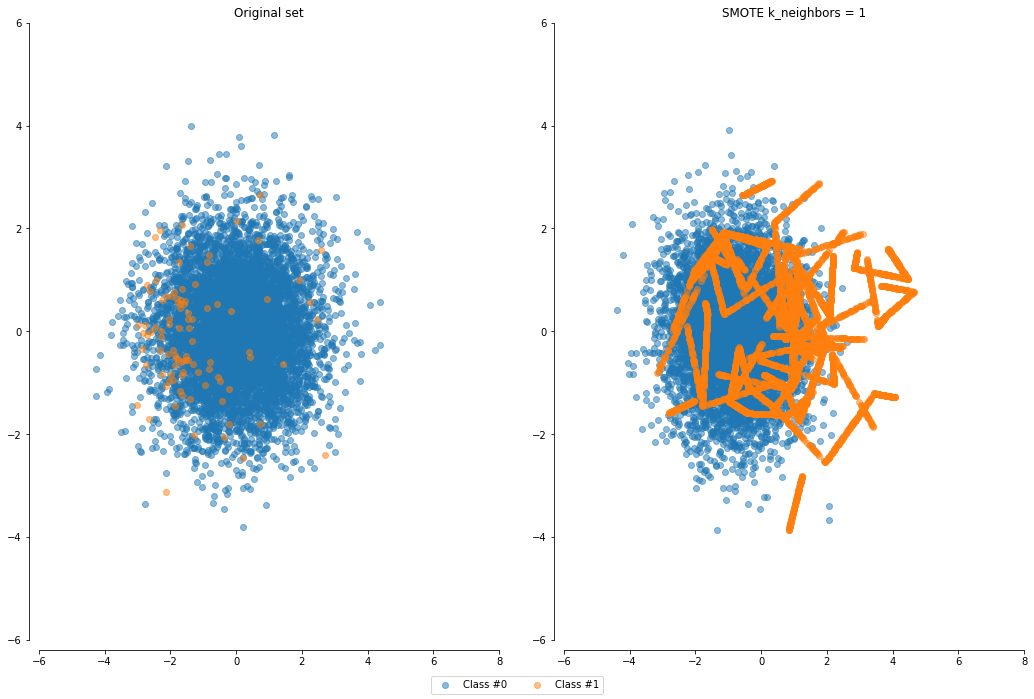

In [ ]:
# visualization oversampling SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X1_train)
X11_res_vis = pca.fit_transform(X11_res)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[Y1_train == 0, 0], X_vis[Y1_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[Y1_train == 1, 0], X_vis[Y1_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X11_res_vis[Y11_res == 0, 0], X11_res_vis[Y11_res == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X11_res_vis[Y11_res == 1, 0], X11_res_vis[Y11_res == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('SMOTE k_neighbors = 1')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.rcParams['figure.figsize'] = (15, 10)
plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

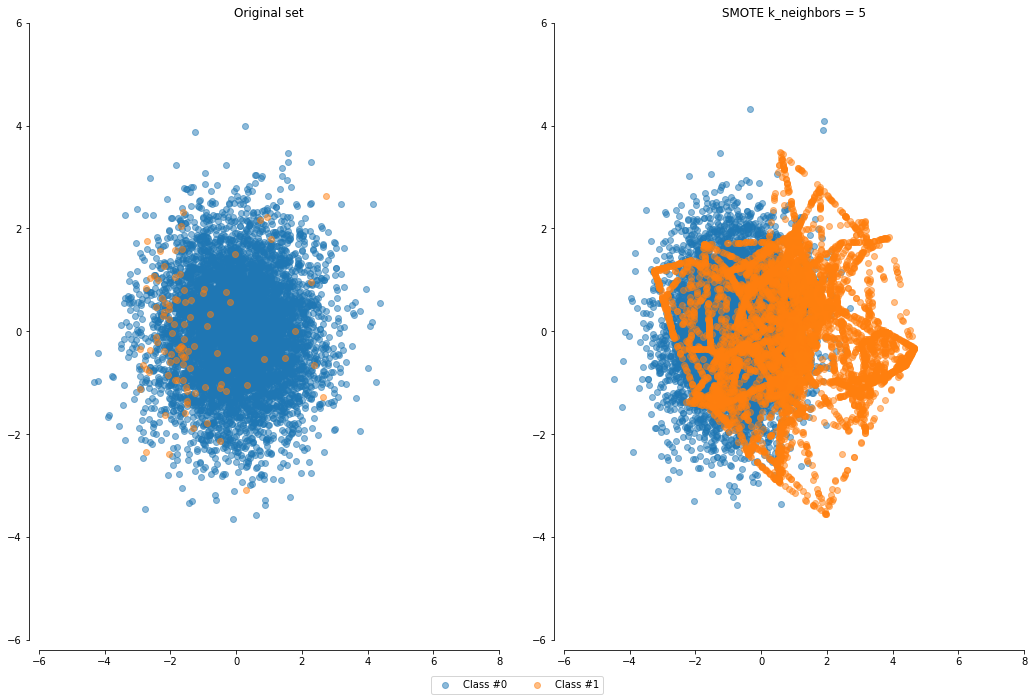

In [ ]:
# visualization oversampling SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X1_train)
X22_res_vis = pca.fit_transform(X22_res)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[Y1_train == 0, 0], X_vis[Y1_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[Y1_train == 1, 0], X_vis[Y1_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X22_res_vis[Y22_res == 0, 0], X22_res_vis[Y22_res == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X22_res_vis[Y22_res == 1, 0], X22_res_vis[Y22_res == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('SMOTE k_neighbors = 5')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.rcParams['figure.figsize'] = (15, 10)
plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

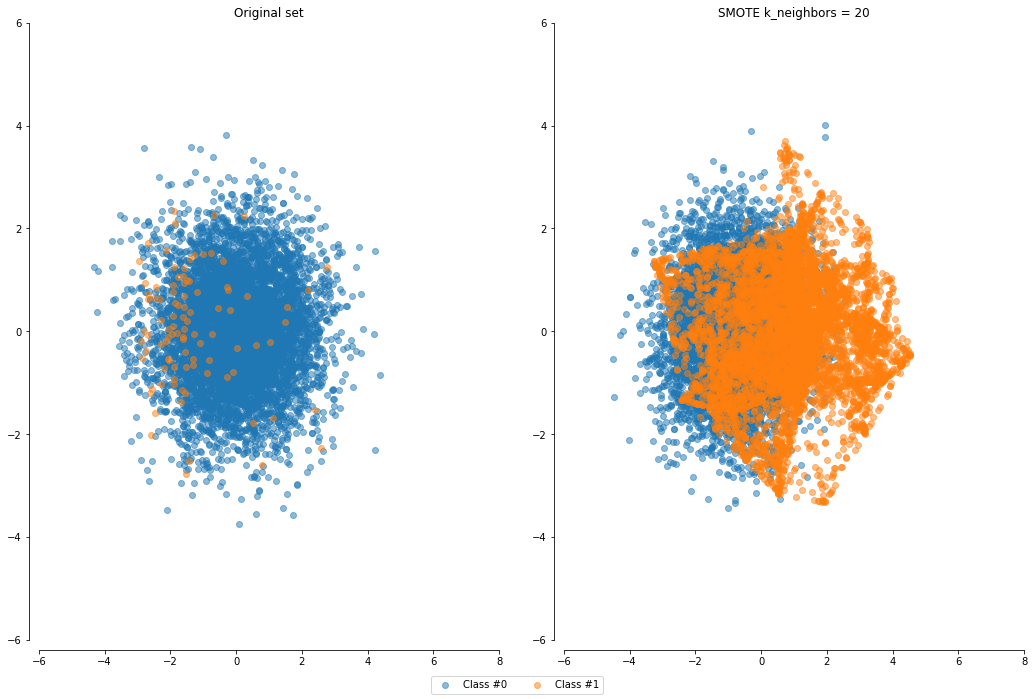

In [ ]:
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X1_train)
X33_res_vis = pca.fit_transform(X33_res)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[Y1_train == 0, 0], X_vis[Y1_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[Y1_train == 1, 0], X_vis[Y1_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X33_res_vis[Y33_res == 0, 0], X33_res_vis[Y33_res == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X33_res_vis[Y33_res == 1, 0], X33_res_vis[Y33_res == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('SMOTE k_neighbors = 20')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.rcParams['figure.figsize'] = (15, 10)
plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

In [ ]:
# Oversampling

#ADASYN 사용; 주위 데이터의 분포에 따라 발생시킬 합성 데이터의 수를 좀 더 체계적으로 조절.
#n_neighbors = 1
from collections import Counter
from imblearn.over_sampling import ADASYN 
SEED = 2021
print('Original dataset shape %s' % Counter(Y1_train))

ada1 = ADASYN(n_neighbors=1,random_state=SEED)
X1_res, Y1_res = ada1.fit_resample(X1_train, Y1_train)
print('Resampled dataset shape %s' % Counter(Y1_res))

Original dataset shape Counter({0: 6604, 1: 96})
Resampled dataset shape Counter({0: 6604, 1: 6576})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#ADASYN 사용, n_neighbors = 5
print('Original dataset shape %s' % Counter(Y1_train))

ada2 = ADASYN(n_neighbors=5,random_state=SEED)
X2_res, Y2_res = ada2.fit_resample(X1_train, Y1_train)
print('Resampled dataset shape %s' % Counter(Y2_res))

Original dataset shape Counter({0: 6604, 1: 96})
Resampled dataset shape Counter({1: 6617, 0: 6604})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#ADASYN 사용, n_neighbors = 20
print('Original dataset shape %s' % Counter(Y1_train))

ada3 = ADASYN(n_neighbors=20,random_state=SEED)
X3_res, Y3_res = ada3.fit_resample(X1_train, Y1_train)
print('Resampled dataset shape %s' % Counter(Y3_res))

Original dataset shape Counter({0: 6604, 1: 96})
Resampled dataset shape Counter({1: 6616, 0: 6604})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


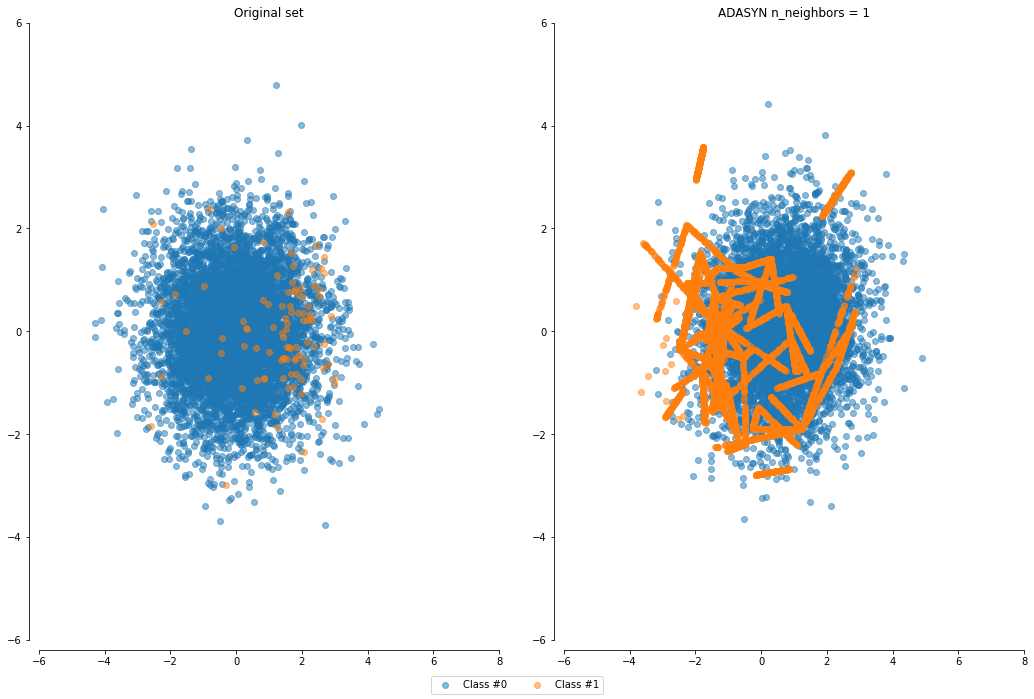

In [ ]:
# visualization oversampling ADASYN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X1_train)
X_res_vis = pca.fit_transform(X1_res)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[Y1_train == 0, 0], X_vis[Y1_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[Y1_train == 1, 0], X_vis[Y1_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[Y1_res == 0, 0], X_res_vis[Y1_res == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[Y1_res == 1, 0], X_res_vis[Y1_res == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('ADASYN n_neighbors = 1')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.rcParams['figure.figsize'] = (15, 10)
plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

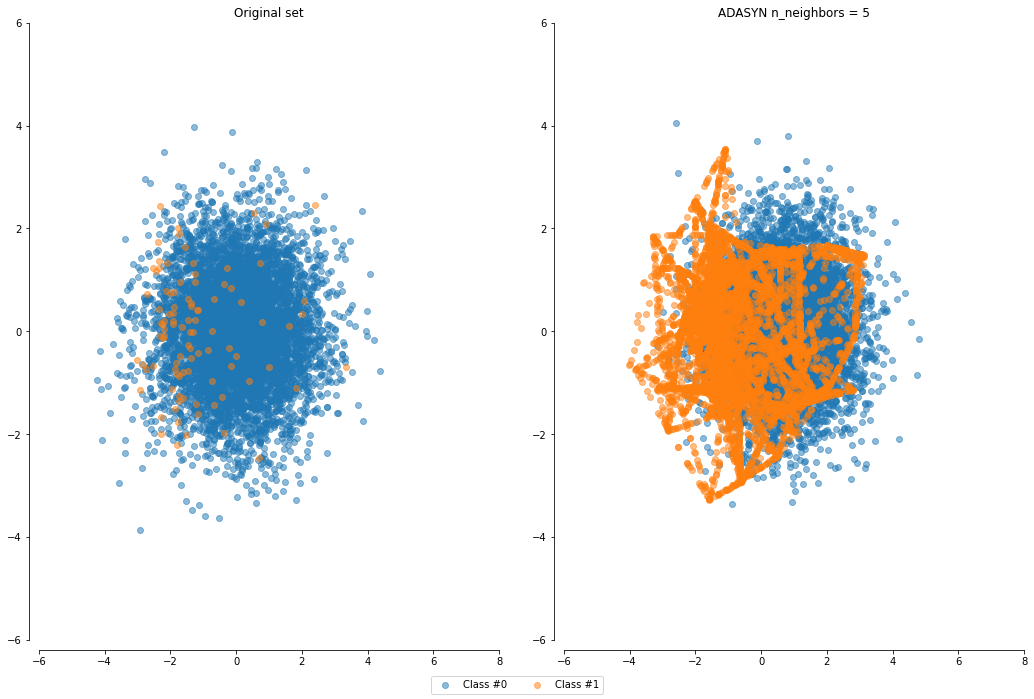

In [ ]:
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X1_train)
X1_res_vis = pca.fit_transform(X2_res)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[Y1_train == 0, 0], X_vis[Y1_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[Y1_train == 1, 0], X_vis[Y1_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X1_res_vis[Y2_res == 0, 0], X1_res_vis[Y2_res == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X1_res_vis[Y2_res == 1, 0], X1_res_vis[Y2_res == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('ADASYN n_neighbors = 5')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.rcParams['figure.figsize'] = (15, 10)
plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

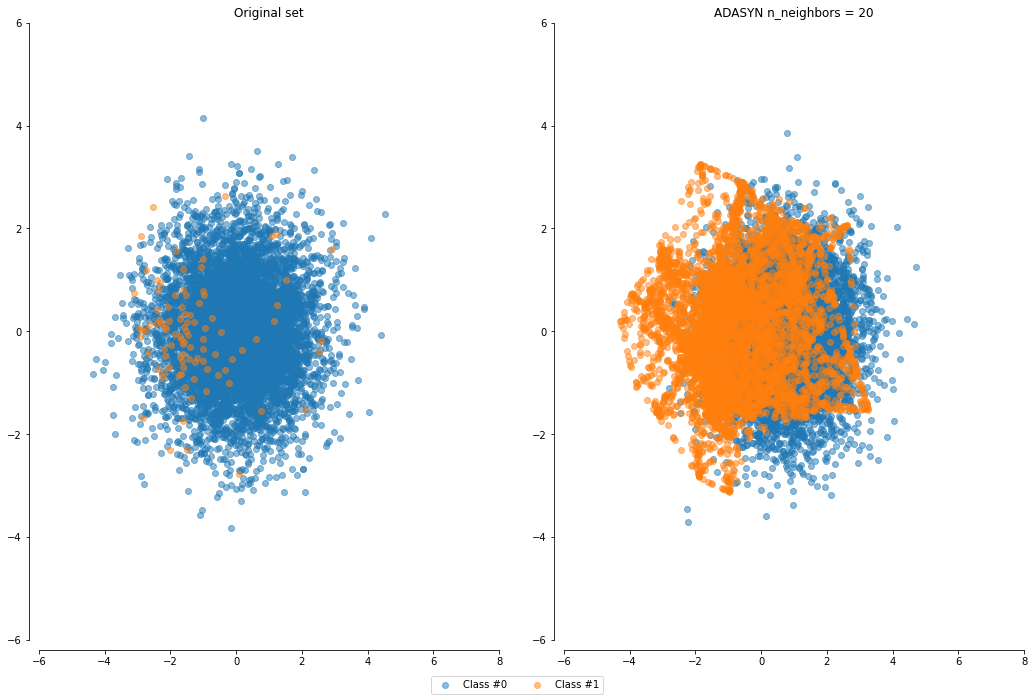

In [ ]:
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X1_train)
X2_res_vis = pca.fit_transform(X3_res)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[Y1_train == 0, 0], X_vis[Y1_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[Y1_train == 1, 0], X_vis[Y1_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X2_res_vis[Y3_res == 0, 0], X2_res_vis[Y3_res == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X2_res_vis[Y3_res == 1, 0], X2_res_vis[Y3_res == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('ADASYN n_neighbors = 20')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.rcParams['figure.figsize'] = (15, 10)
plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

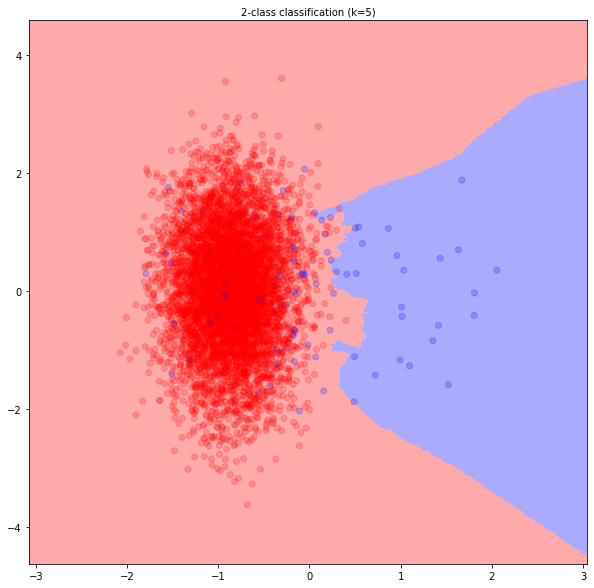

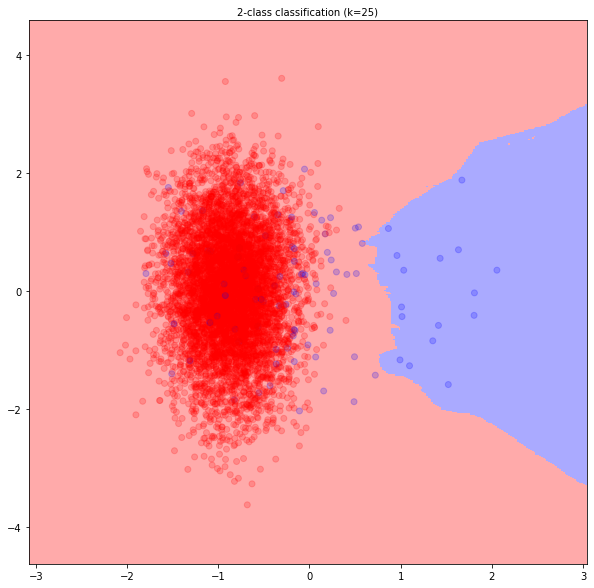

In [ ]:
#주어진 데이터 KNN(weights = weight = uniform, K=5, 25
#plt.scatter에서 alpha로 투명도 조절

import matplotlib
from matplotlib.colors import ListedColormap

x_vis = X1_train[:,:2]
y_vis = Y1_train

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for k in [5,25]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_vis, y_vis)
    
    x_min, x_max= x_vis[:,0].min()-1, x_vis[:,0].max()+1
    y_min, y_max= x_vis[:,1].min()-1, x_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z= Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    plt.scatter(x_vis[:,0],x_vis[:,1],c=y_vis,cmap=cmap_bold, alpha = 0.2)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)
    
plt.show()

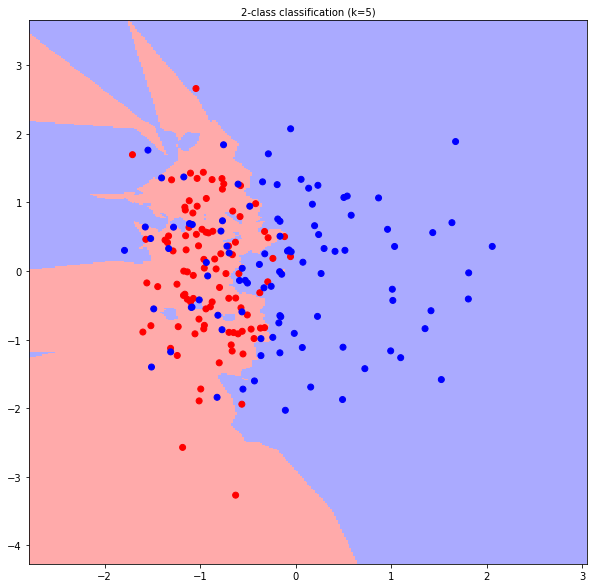

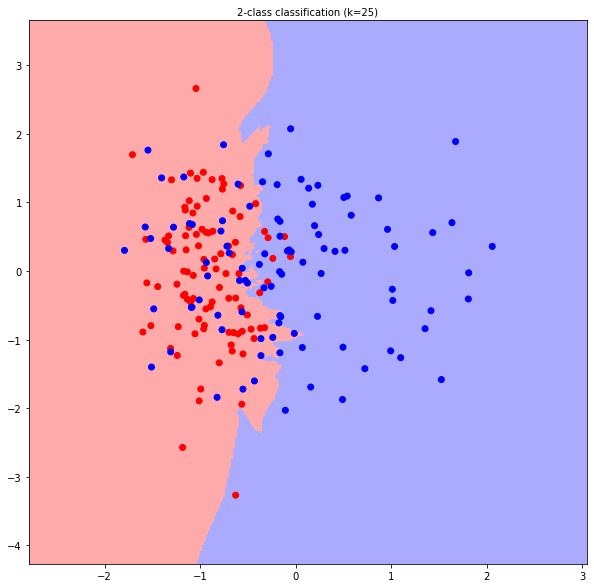

In [ ]:
#Undersampling k=5, 25

x1_vis = X1_resampled[:,:2]
y1_vis = Y1_resampled

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for k in [5,25]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x1_vis, y1_vis)
    
    x1_min, x1_max= x1_vis[:,0].min()-1, x1_vis[:,0].max()+1
    y1_min, y1_max= x1_vis[:,1].min()-1, x1_vis[:,1].max()+1
    xx1, yy1 = np.meshgrid(np.arange(x1_min,x1_max,h),
                        np.arange(y1_min, y1_max,h))
    Z=clf.predict(np.c_[xx1.ravel(), yy1.ravel()])
    
    Z= Z.reshape(xx1.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx1,yy1,Z,cmap=cmap_light)
    
    plt.scatter(x1_vis[:,0],x1_vis[:,1],c=y1_vis,cmap=cmap_bold)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(yy1.min(),yy1.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)
    
plt.show()


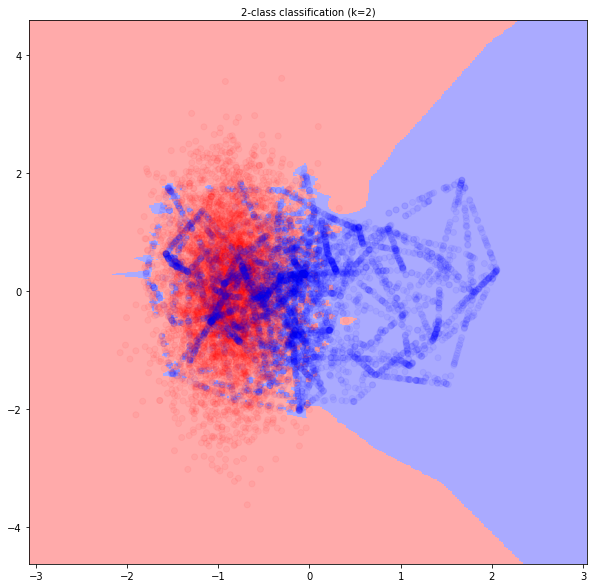

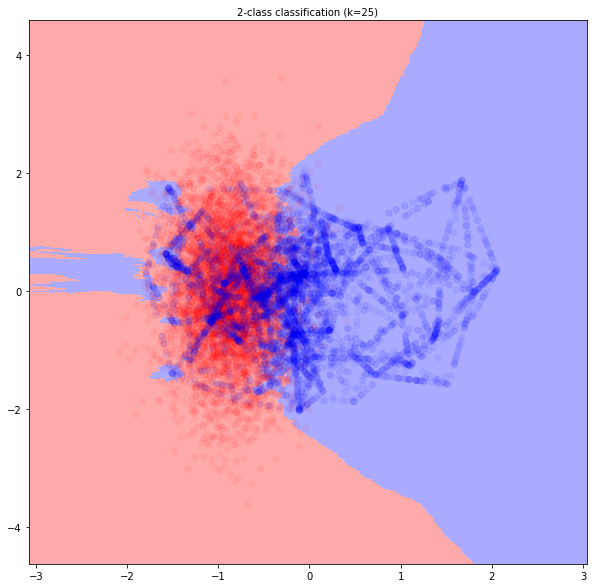

In [ ]:
#oversampling(SMOTE)

x11_vis = X22_res[:,:2]
y11_vis = Y22_res

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for k in [2,25]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x11_vis, y11_vis)
    
    x11_min, x11_max= x11_vis[:,0].min()-1, x11_vis[:,0].max()+1
    y11_min, y11_max= x11_vis[:,1].min()-1, x11_vis[:,1].max()+1
    xx11, yy11 = np.meshgrid(np.arange(x11_min,x11_max,h),
                        np.arange(y11_min, y11_max,h))
    Z=clf.predict(np.c_[xx11.ravel(), yy11.ravel()])
    
    Z= Z.reshape(xx11.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx11,yy11,Z,cmap=cmap_light)
    
    plt.scatter(x11_vis[:,0],x11_vis[:,1],c=y11_vis,cmap=cmap_bold, alpha=0.05)
    plt.xlim(xx11.min(),xx11.max())
    plt.ylim(yy11.min(),yy11.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)
    
plt.show()

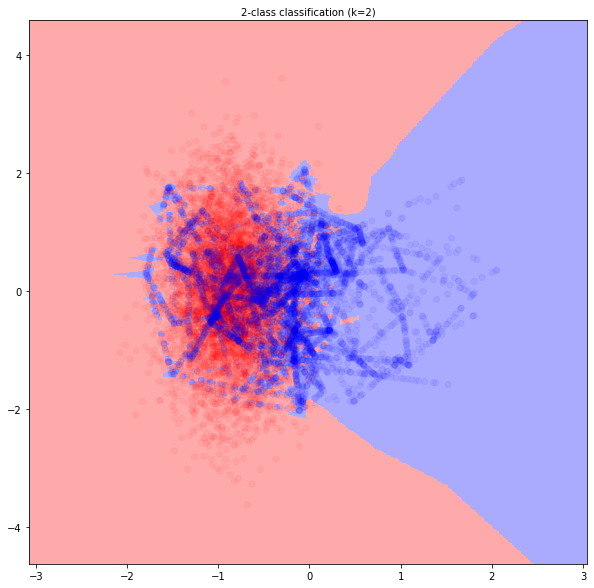

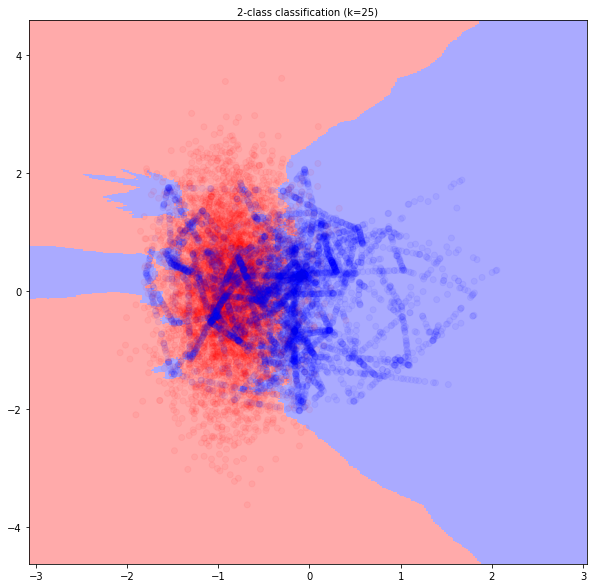

In [ ]:
#oversampling(ADASYN)

x111_vis = X2_res[:,:2]
y111_vis = Y2_res

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for k in [2,25]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x111_vis, y111_vis)
    
    x111_min, x111_max= x111_vis[:,0].min()-1, x111_vis[:,0].max()+1
    y111_min, y111_max= x111_vis[:,1].min()-1, x111_vis[:,1].max()+1
    xx111, yy111 = np.meshgrid(np.arange(x111_min,x111_max,h),
                        np.arange(y111_min, y111_max,h))
    Z=clf.predict(np.c_[xx111.ravel(), yy111.ravel()])
    
    Z= Z.reshape(xx111.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx111,yy111,Z,cmap=cmap_light)
    
    plt.scatter(x111_vis[:,0],x111_vis[:,1],c=y111_vis,cmap=cmap_bold, alpha = 0.05)
    plt.xlim(xx111.min(),xx111.max())
    plt.ylim(yy111.min(),yy111.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)
    
plt.show()